Bias detection

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17336\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
df = pd.read_csv(r"C:\Users\17336\CS-178\cs178-final-VAST2021\data\news_articles.csv", delimiter="|", engine="python")
df = df.dropna(subset=["content", "source"])  # Drop rows without content or source


In [14]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity  # Range: [-1, 1]

df["sentiment"] = df["content"].apply(get_sentiment)

In [15]:
def extract_entities(text):
    people = re.findall(r"\b[A-Z][a-z]+\s[A-Z][a-z]+\b", str(text))
    orgs = re.findall(r"\b[A-Z][A-Za-z]+(?: Inc| Corp| PLC| LLC| Company| Group| Organization| Committee| Union)?\b", str(text))
    return list(set(people + orgs))

df["entities"] = df["content"].apply(extract_entities)

In [ ]:
import spacy

In [36]:
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def extract_entities_spacy(text):
    doc = nlp(str(text))  # Process the text with spaCy
    entities = []
    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG"] and not any(char.isdigit() for char in ent.text): 
            entities.append(ent.text)
    return list(set(entities))  # Remove duplicates

# Apply the function to the DataFrame
df["entities"] = df["content"].apply(extract_entities_spacy)

In [37]:
df["entities"]

0           [Kronos, POK, van, the Protectors of Kronos]
1                          [Marek, Silvia Marek, Kronos]
2                    [Tomas Sarto, Luis Araullo, Kronos]
3      [Tiskele Bend, Kronos - Nestled, Hank Fluss - ...
4      [Elodis Weekly Journal, Henk Bodrogi, Kronos, ...
                             ...                        
840    [Science, Araullo, Kapelou, Nespola, a Master ...
841                                       [POK, Kapelou]
842    [Carman Adrien, Kapelou, Elian Karel, Rufus Dr...
843    [Michale Kraft, Carman Adrien, Karel, Elian Ka...
844            [the central Institute of the statistics]
Name: entities, Length: 845, dtype: object

In [38]:
df_expanded = df.explode("entities")
df_expanded = df_expanded.dropna(subset=["entities"])

c:\Users\17336\.conda\envs\CS--178\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25251 (\N{CJK UNIFIED IDEOGRAPH-62A3}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\17336\.conda\envs\CS--178\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25251 (\N{CJK UNIFIED IDEOGRAPH-62A3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


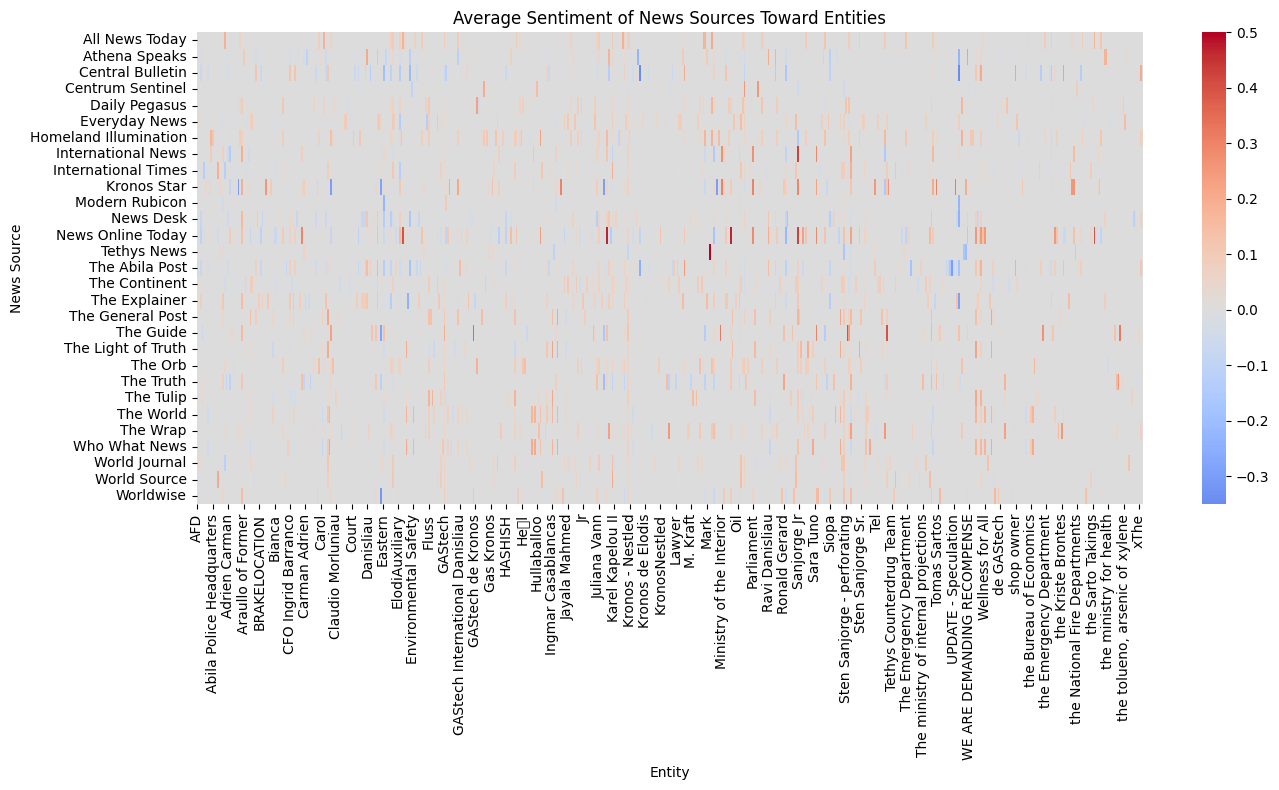

In [39]:
pivot = df_expanded.pivot_table(values="sentiment", index="source", columns="entities", aggfunc="mean").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="coolwarm", center=0)
plt.title("Average Sentiment of News Sources Toward Entities")
plt.ylabel("News Source")
plt.xlabel("Entity")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [40]:
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(pivot)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(pca_coords)

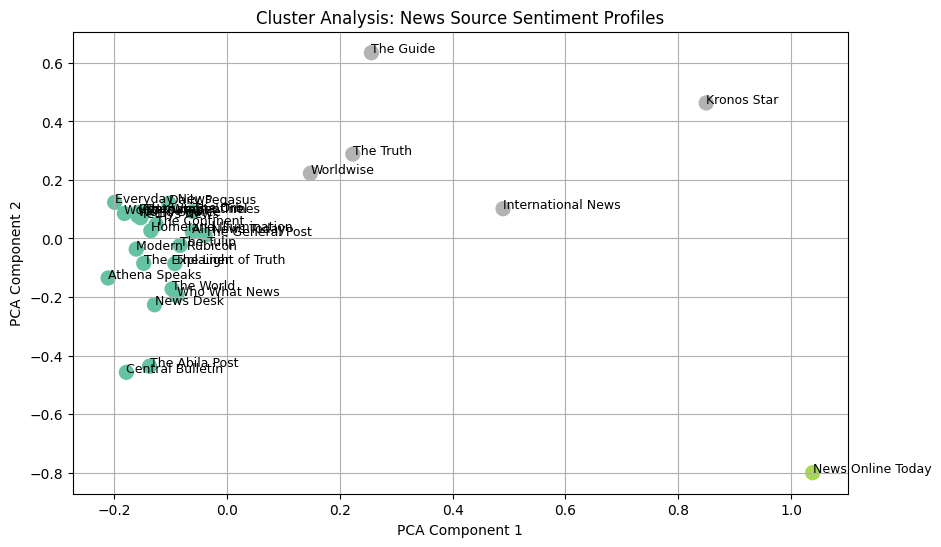

In [41]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c=labels, cmap="Set2", s=100)

for i, txt in enumerate(pivot.index):
    plt.annotate(txt, (pca_coords[i, 0], pca_coords[i, 1]), fontsize=9)

plt.title("Cluster Analysis: News Source Sentiment Profiles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [44]:
top_pos = df[df["sentiment"] > 0.5][["source", "content", "sentiment"]].head(3)
top_neg = df[df["sentiment"] < -0.2][["source", "content", "sentiment"]].head(3)


In [45]:
print("\nPositive Sentiment Samples:")
print(top_pos.to_string(index=False))

print("\nNegative Sentiment Samples:")
print(top_neg.to_string(index=False))


Positive Sentiment Samples:
           source                                                                                                                                                                                                                                                                             content  sentiment
News Online Today Protesters aligned with the Protectors of Kronos (POK) activist group surrounded government buildings chanting and carry images of their so-called martyrs. Kronos government security forces in concert with Abila police suppressed the protest with an impressive show of force.        1.0

Negative Sentiment Samples:
          source                                                                                                                                                                                                                                                                                                                            